In [8]:
import pandas as pd

#Load Dataset
df = pd.read_csv("../data/adult.csv", skiprows=1, header=None, names=[
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
])

# First rows visualization
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [9]:
df["age"] = pd.to_numeric(df["age"], errors="coerce")
df["hours-per-week"] = pd.to_numeric(df["hours-per-week"], errors="coerce")

In [10]:
subset = df[["age", "education", "occupation", "hours-per-week", "income"]].copy()
discrete_columns = ["education", "occupation", "income"]

In [11]:
from ctgan import CTGAN

ctgan = CTGAN(epochs=300)
ctgan.fit(subset, discrete_columns)

synthetic_data = ctgan.sample(1000)
synthetic_data.head()

,age,education,occupation,hours-per-week,income
0,34,HS-grad,Armed-Forces,59,>50K
1,26,Assoc-acdm,?,40,<=50K
2,55,Doctorate,Prof-specialty,44,>50K
3,37,HS-grad,Handlers-cleaners,40,<=50K
4,59,HS-grad,Craft-repair,41,<=50K


In [12]:
import pandas as pd

# 1. Rimuovi righe che contengono valori sospetti ("?")
synthetic_data_clean = synthetic_data[~synthetic_data.isin(["?"]).any(axis=1)]

# 2. Converti 'age' e 'hours-per-week' in numerici (se non già numerici)
synthetic_data_clean["age"] = pd.to_numeric(synthetic_data_clean["age"], errors="coerce")
synthetic_data_clean["hours-per-week"] = pd.to_numeric(synthetic_data_clean["hours-per-week"], errors="coerce")

# 3. Rimuovi righe con NaN (dovuti alla conversione fallita)
synthetic_data_clean = synthetic_data_clean.dropna()

# 4. Eventuale cast finale (es. età come intero)
synthetic_data_clean["age"] = synthetic_data_clean["age"].astype(int)
synthetic_data_clean["hours-per-week"] = synthetic_data_clean["hours-per-week"].astype(int)

# 5. Reset index (opzionale)
synthetic_data_clean = synthetic_data_clean.reset_index(drop=True)

In [13]:
print(synthetic_data_clean.dtypes)
print(synthetic_data_clean.isin(["?"]).sum())  # Controlla presenza residua di '?'
print(synthetic_data_clean.describe())
print(synthetic_data_clean["occupation"].value_counts())

age                int64
education         object
occupation        object
hours-per-week     int64
income            object
dtype: object
age               0
education         0
occupation        0
hours-per-week    0
income            0
dtype: int64
              age  hours-per-week
count  942.000000      942.000000
mean    39.444798       41.429936
std     14.039818       10.337703
min     17.000000        7.000000
25%     29.000000       40.000000
50%     37.000000       40.000000
75%     48.000000       45.000000
max     87.000000       88.000000
occupation
Craft-repair         150
Exec-managerial      149
Prof-specialty       122
Machine-op-inspct     79
Sales                 75
Transport-moving      62
Handlers-cleaners     60
Adm-clerical          52
Tech-support          48
Other-service         45
Farming-fishing       44
Protective-serv       23
Priv-house-serv       22
Armed-Forces          11
Name: count, dtype: int64


In [14]:
synthetic_data_clean = synthetic_data_clean[
    (synthetic_data_clean["age"] >= 18) & 
    (synthetic_data_clean["hours-per-week"] >= 10)
]

In [15]:
synthetic_data_clean.to_csv("synthetic_adult_clean.csv", index=False)

# Synthetic Data Validation


📊 Analisi numerica: age
   KS-test → stat=0.0421, p-value=0.0751
   Wasserstein distance: 1.2612


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


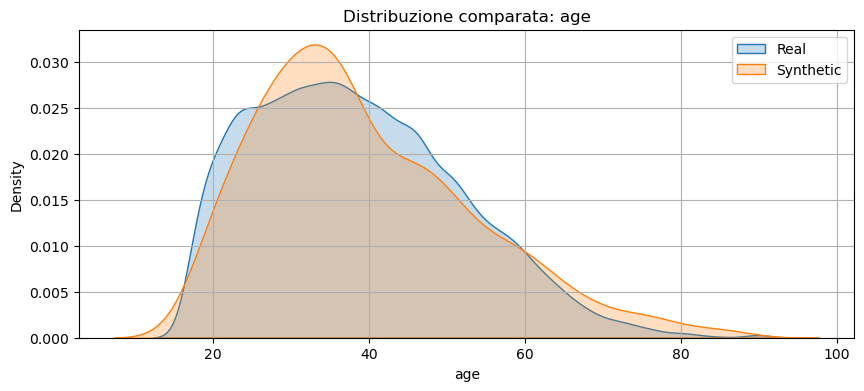


📊 Analisi numerica: hours-per-week
   KS-test → stat=0.0599, p-value=0.0026
   Wasserstein distance: 1.5778


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


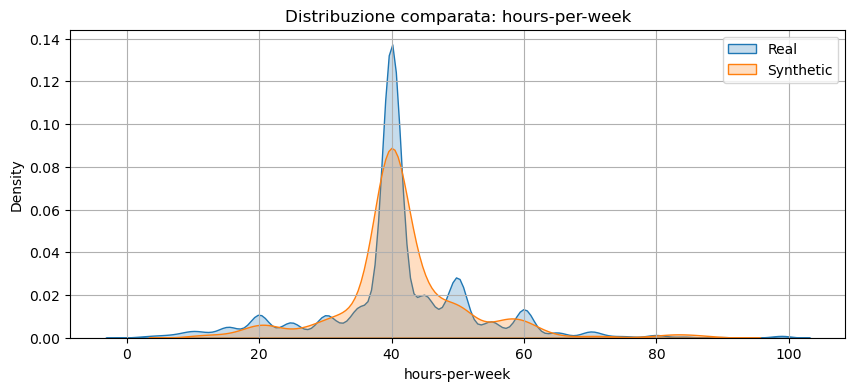


🧩 Analisi categorica: education
   Total Variation Distance: 0.1525


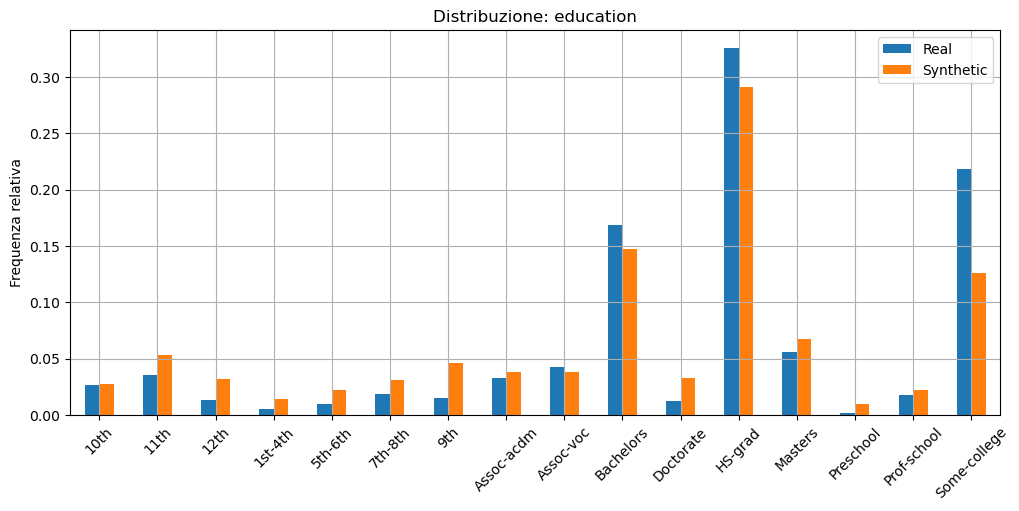

               Real  Synthetic
10th          0.027      0.028
11th          0.035      0.053
12th          0.013      0.032
1st-4th       0.005      0.014
5th-6th       0.010      0.022
7th-8th       0.018      0.031
9th           0.015      0.046
Assoc-acdm    0.033      0.038
Assoc-voc     0.043      0.038
Bachelors     0.169      0.147
Doctorate     0.013      0.033
HS-grad       0.325      0.291
Masters       0.056      0.067
Preschool     0.002      0.010
Prof-school   0.018      0.022
Some-college  0.218      0.126

🧩 Analisi categorica: occupation
   Total Variation Distance: 0.1705


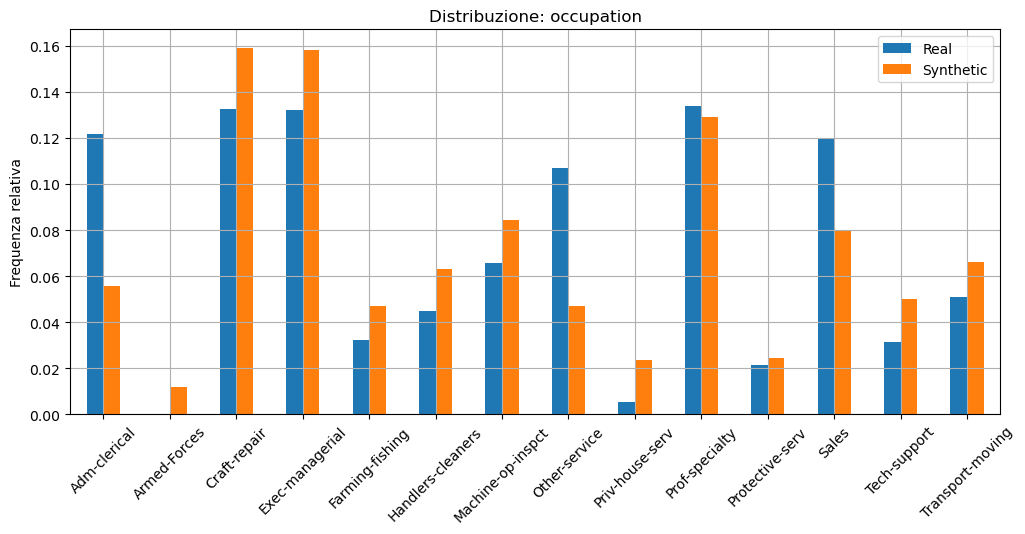

                    Real  Synthetic
Adm-clerical       0.122      0.056
Armed-Forces       0.000      0.012
Craft-repair       0.133      0.159
Exec-managerial    0.132      0.158
Farming-fishing    0.032      0.047
Handlers-cleaners  0.045      0.063
Machine-op-inspct  0.066      0.084
Other-service      0.107      0.047
Priv-house-serv    0.005      0.024
Prof-specialty     0.134      0.129
Protective-serv    0.021      0.025
Sales              0.120      0.080
Tech-support       0.031      0.050
Transport-moving   0.051      0.066

🧩 Analisi categorica: income
   Total Variation Distance: 0.0307


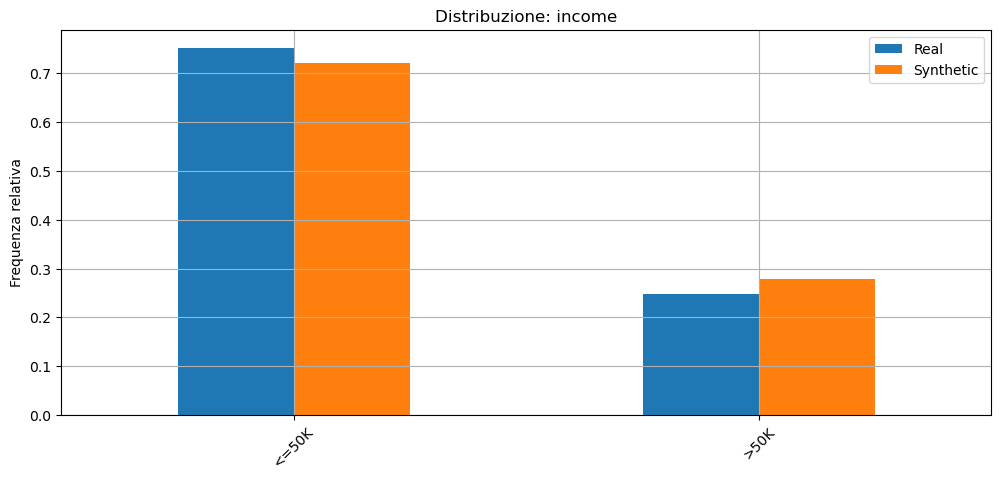

        Real  Synthetic
<=50K  0.752      0.721
>50K   0.248      0.279


In [16]:
# %%
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp, wasserstein_distance
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Carica dataset reale e sintetico
real = subset.copy()
synthetic = pd.read_csv("../data/synthetic_adult_clean.csv")

# Pulizia base
real = real[~real.isin(["?"]).any(axis=1)]
real["age"] = pd.to_numeric(real["age"], errors="coerce")
real["hours-per-week"] = pd.to_numeric(real["hours-per-week"], errors="coerce")
real = real.dropna()
real["age"] = real["age"].astype(int)
real["hours-per-week"] = real["hours-per-week"].astype(int)

# %%
# 1. VARIABILI NUMERICHE
numerical = ["age", "hours-per-week"]

for col in numerical:
    print(f"\n📊 Analisi numerica: {col}")
    
    # KS test
    ks_stat, ks_p = ks_2samp(real[col], synthetic[col])
    print(f"   KS-test → stat={ks_stat:.4f}, p-value={ks_p:.4f}")
    
    # Wasserstein Distance
    wd = wasserstein_distance(real[col], synthetic[col])
    print(f"   Wasserstein distance: {wd:.4f}")
    
    # Plot distribuzioni
    plt.figure(figsize=(10, 4))
    sns.kdeplot(real[col], label="Real", fill=True)
    sns.kdeplot(synthetic[col], label="Synthetic", fill=True)
    plt.title(f"Distribuzione comparata: {col}")
    plt.legend()
    plt.grid(True)
    plt.show()

# %%
# 2. VARIABILI CATEGORICHE
categorical = ["education", "occupation", "income"]

def total_variation(p, q):
    """Calcola la distanza di variazione totale tra due distribuzioni"""
    p = np.array(p)
    q = np.array(q)
    return 0.5 * np.abs(p - q).sum()

for col in categorical:
    print(f"\n🧩 Analisi categorica: {col}")
    
    real_dist = real[col].value_counts(normalize=True).sort_index()
    synth_dist = synthetic[col].value_counts(normalize=True).sort_index()
    
    all_categories = sorted(set(real_dist.index).union(set(synth_dist.index)))
    real_freq = [real_dist.get(cat, 0) for cat in all_categories]
    synth_freq = [synth_dist.get(cat, 0) for cat in all_categories]
    
    tvd = total_variation(real_freq, synth_freq)
    print(f"   Total Variation Distance: {tvd:.4f}")
    
    # Plot
    comparison = pd.DataFrame({
        "Real": real_freq,
        "Synthetic": synth_freq
    }, index=all_categories)
    
    comparison.plot(kind="bar", figsize=(12,5), title=f"Distribuzione: {col}", grid=True)
    plt.ylabel("Frequenza relativa")
    plt.xticks(rotation=45)
    plt.show()
    print(comparison.round(3))